### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [0]:
%tensorflow_version 2.x

In [3]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [0]:
tf.random.set_seed(42)

### Collect Data

In [6]:
import keras

Using TensorFlow backend.


In [0]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [8]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [0]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [30]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

label for each of the below image: 9
label for each of the below image: 0
label for each of the below image: 0
label for each of the below image: 3
label for each of the below image: 0
label for each of the below image: 2
label for each of the below image: 7
label for each of the below image: 2
label for each of the below image: 5
label for each of the below image: 5


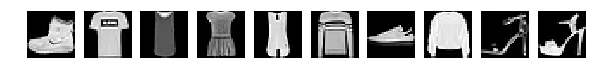

In [31]:
import numpy as np

# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(trainX[i].reshape(28, 28), cmap="gray")
    plt.axis('off')
    print('label for each of the below image: %s' % (np.argmax(trainY[0:10][i])))
plt.show()

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras import optimizers
from tensorflow.keras.backend import backend

In [0]:

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [35]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=30)



Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 71us/sample - loss: 6150.1695 - accuracy: 0.7375 - val_loss: 4236.3978 - val_accuracy: 0.7860
Epoch 2/30
60000/60000 [==============================] - 4s 63us/sample - loss: 4884.1101 - accuracy: 0.7771 - val_loss: 8756.7917 - val_accuracy: 0.6323
Epoch 3/30
60000/60000 [==============================] - 4s 63us/sample - loss: 4688.5255 - accuracy: 0.7864 - val_loss: 6904.9165 - val_accuracy: 0.7909
Epoch 4/30
60000/60000 [==============================] - 4s 61us/sample - loss: 4494.1222 - accuracy: 0.7911 - val_loss: 3420.7534 - val_accuracy: 0.8119
Epoch 5/30
60000/60000 [==============================] - 4s 59us/sample - loss: 4418.4293 - accuracy: 0.7957 - val_loss: 3250.4258 - val_accuracy: 0.8019
Epoch 6/30
60000/60000 [==============================] - 4s 59us/sample - loss: 4478.3483 - accuracy: 0.7947 - val_loss: 3879.0837 - val_accuracy: 0.7746
Epoch 7/30
60000/600

### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [0]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [39]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50,
          batch_size = 32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 108us/sample - loss: 0.5558 - accuracy: 0.8087 - val_loss: 0.5220 - val_accuracy: 0.8260
Epoch 2/50
60000/60000 [==============================] - 7s 114us/sample - loss: 0.4875 - accuracy: 0.8324 - val_loss: 0.5048 - val_accuracy: 0.8250
Epoch 3/50
60000/60000 [==============================] - 19s 320us/sample - loss: 0.4699 - accuracy: 0.8370 - val_loss: 0.5056 - val_accuracy: 0.8381
Epoch 4/50
60000/60000 [==============================] - 11s 185us/sample - loss: 0.4604 - accuracy: 0.8414 - val_loss: 0.5163 - val_accuracy: 0.8306
Epoch 5/50
60000/60000 [==============================] - 17s 284us/sample - loss: 0.4572 - accuracy: 0.8413 - val_loss: 0.4868 - val_accuracy: 0.8373
Epoch 6/50
60000/60000 [==============================] - 9s 153us/sample - loss: 0.4523 - accuracy: 0.8417 - val_loss: 0.4785 - val_accuracy: 0.8387
Epoch 7/50
60000/60000 [=======================

### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)

In [0]:
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50,
          batch_size = 32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 5s 90us/sample - loss: 0.8747 - accuracy: 0.7022 - val_loss: 0.6811 - val_accuracy: 0.7678
Epoch 2/50
60000/60000 [==============================] - 5s 77us/sample - loss: 0.6410 - accuracy: 0.7804 - val_loss: 0.6157 - val_accuracy: 0.7921
Epoch 3/50
60000/60000 [==============================] - 5s 79us/sample - loss: 0.5884 - accuracy: 0.7970 - val_loss: 0.5834 - val_accuracy: 0.8026
Epoch 4/50
60000/60000 [==============================] - 5s 81us/sample - loss: 0.5590 - accuracy: 0.8077 - val_loss: 0.5576 - val_accuracy: 0.8092
Epoch 5/50
60000/60000 [==============================] - 5s 76us/sample - loss: 0.5439 - accuracy: 0.8133 - val_loss: 0.5440 - val_accuracy: 0.8130
Epoch 6/50
60000/60000 [==============================] - 5s 76us/sample - loss: 0.5307 - accuracy: 0.8159 - val_loss: 0.5262 - val_accuracy: 0.8181
Epoch 7/50
60000/60000 [==============================] 

### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. 


In [0]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

model.add(tf.keras.layers.BatchNormalization())


In [0]:
model.add(tf.keras.layers.Dense(100, activation='sigmoid', name= "Layer_1"))
model.add(tf.keras.layers.Dense(100, activation='sigmoid', name= "Layer_2"))
model.add(tf.keras.layers.Dense(10, activation='sigmoid', name= "Layer_3"))

In [0]:
model.add(tf.keras.layers.Dense(10, activation='softmax', name = "Output"))

In [0]:
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)

model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

## Review model

In [24]:
model.layers

### Run the model

In [16]:
model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50,
          batch_size = 32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 119us/sample - loss: 1.8902 - accuracy: 0.3589 - val_loss: 1.4141 - val_accuracy: 0.5386
Epoch 2/50
60000/60000 [==============================] - 6s 102us/sample - loss: 1.1712 - accuracy: 0.6063 - val_loss: 0.9508 - val_accuracy: 0.6550
Epoch 3/50
60000/60000 [==============================] - 6s 103us/sample - loss: 0.8706 - accuracy: 0.6770 - val_loss: 0.7845 - val_accuracy: 0.7152
Epoch 4/50
60000/60000 [==============================] - 6s 104us/sample - loss: 0.7437 - accuracy: 0.7264 - val_loss: 0.6854 - val_accuracy: 0.7436
Epoch 5/50
60000/60000 [==============================] - 6s 101us/sample - loss: 0.6627 - accuracy: 0.7574 - val_loss: 0.6175 - val_accuracy: 0.7802
Epoch 6/50
60000/60000 [==============================] - 6s 102us/sample - loss: 0.6005 - accuracy: 0.7869 - val_loss: 0.5674 - val_accuracy: 0.7984
Epoch 7/50
60000/60000 [==========================